# Homework 1: Six Degrees of Kevin Bacon

Read [bfs_six_degrees.pdf](bfs_six_degrees.pdf) for the assignment spec. Submit this .ipynb to the professor to demonstrate your solution. This is unofficial and is maintained by a fellow student, Justin, aka the glizzy goblin.

In [ ]:
from graph_tools import graph
from collections import deque
from random import sample
from timeit import timeit
import matplotlib.pyplot as plt

In [ ]:
# Helper Functions
def process_credits_file_to_graph(graph:graph, file_path:str):
    try:
        with  open(file_path, 'r', encoding='utf-8') as list_edges:
            for line in list_edges:
                process_line(graph, line)
    except FileNotFoundError:
        print(f"Error: was not able to find {file_path}")
    except UnicodeDecodeError as e:
        print(f"Encoding error while reading the file: {e}")

def process_line(graph:graph, line:str):
    split_line = line.strip().split()
    if not split_line: return
    
    movie_name, actors = split_line[0], split_line[1:]
    
    for actor_1 in actors:
        co_stars = [actor for actor in actors if actor != actor_1]
        for actor_2 in co_stars:
            graph.Add_und_edge(actor_1, actor_2, movie_name)

In [ ]:
small_actor_graph = graph()
small_file_path = "smaller_imdb_cleaned.txt"
process_credits_file_to_graph(small_actor_graph, small_file_path)

In [22]:
large_actor_graph = graph()
large_actor_file = "all_imdb_cleaned.txt"
process_credits_file_to_graph(large_actor_graph, large_actor_file)

In [23]:
def format_output(merged_result:list):
    if not merged_result: return "No path found"
    out=""
    for i in range(len(merged_result)):
        if i % 2 == 1:
            out += f"-({merged_result[i]})-"
            continue
        out += merged_result[i]
    return out

**Vanilla BFS**

In [24]:
from enum import Enum
class BFS_RETURN_TYPE(Enum):
    shortest_path = 1 # Return the shortest path from start to end.
    level_set = 2 # Return the level sets (vertices grouped by distance).
    connectivity = 3 # Return True/False if end is reachable from start.
    edge_count = 4 #Return the total number of edges traversed.

def reconstruct_path(adj, current, graph):
        # reconstruct path from start to end given adjacency list        
        total_path = []
        while current in adj and current != None:
            total_path.append(current)
            current = adj[current]
        total_path = total_path[::-1]
        movies = [graph.adj_list[total_path[i]][total_path[i + 1]] for i in range(len(total_path) - 1)]
        
        # merge results between actor names and movie edges
        merged_result = [item for pair in zip(total_path, movies) for item in pair]
        merged_result.extend(total_path[len(movies):])

        return merged_result

def bfs(start:str, end:str, graph:graph):
    """
    Perform BFS and return results based on the mode:
    - "shortest_path": Return the shortest path from start to end.
    - "level_set": Return the level sets (vertices grouped by distance).
    - "connectivity": Return True/False if end is reachable from start.
    - "edge_count": Return the total number of edges traversed.
    """
    if start not in graph.vertices or end not in graph.vertices:
        return "Not present"   

    queue = deque([start])
    visited = {actor: False for actor in graph.vertices}
    pred = {actor: None for actor in graph.vertices}
    level_set = {0:[start]}
    # distances = {start: 0}
    edge_count = 0
    
    visited[start] = True
    
    # while queue is not empty
    while queue:
        # pop from queue
        current = queue.popleft()
        # current_level = distances[current]

        if(current == end):
            return reconstruct_path(adj=pred, current=current, graph=graph)
        for neighbor in graph.adj_list[current]:
            edge_count += 1
            if not visited[neighbor]:
                visited[neighbor] = True
                pred[neighbor] = current
                # distances[neighbor] = current_level + 1
                
                queue.append(neighbor)
               
                
    return "Not present"
     

**Bi-Directional BFS**

In [25]:
# Refrenced https://www.geeksforgeeks.org/bidirectional-search/

def reconstruct_bidi_path(start_pred:dict, end_pred:dict, start:str,end:str, mid:str, graph:graph):
    
	total_path = []
	current = mid
	while current in start_pred and current != None:
		total_path.append(current)
		current = start_pred[current]
  
	total_path = total_path[::-1]
	current = end_pred[mid]
 
	while current in end_pred and current != None:
		total_path.append(current)
		current = end_pred[current]
	
	movies = [graph.adj_list[total_path[i]][total_path[i + 1]] for i in range(len(total_path) - 1)]

	# merge results between actor names and movie edges
	merged_result = [item for pair in zip(total_path, movies) for item in pair]
	merged_result.extend(total_path[len(movies):])
	return merged_result

def BiDi_BFS(start: str, end: str, graph: graph):
	if start not in graph.vertices or end not in graph.vertices:
		return "Not present"
	start_queue = deque([])
	end_queue = deque([])

	# initializes start and end visted nodes as false
	start_visited = {actor: False for actor in graph.vertices}
	end_visited = {actor: False for actor in graph.vertices}

	#initialize start and end adj list
	start_pred = {actor: None for actor in graph.vertices}
	end_pred = {actor: None for actor in graph.vertices}
	
	start_queue.append(start)
	start_visited[start] = True
 
	end_queue.append(end)
	end_visited[end] = True
	
	while len(start_queue) > 0  and len(end_queue) > 0:
		# Forward BFS
		curr_start = start_queue.popleft()
		for neighbor in graph.adj_list[curr_start]:
			if not start_visited[neighbor]:
				start_visited[neighbor] = True
				start_pred[neighbor] = curr_start
				start_queue.append(neighbor)
			if(end_visited[neighbor]): # intersection has been found
				return reconstruct_bidi_path(start_pred, end_pred, start, end, neighbor, graph)
			
		# Backward BFS
		curr_end = end_queue.popleft()
		for neighbor in graph.adj_list[curr_end]:
			if not end_visited[neighbor]:
				end_visited[neighbor] = True
				end_pred[neighbor] = curr_end
				end_queue.append(neighbor)
			if(start_visited[neighbor]): # intersection has been found
				return reconstruct_bidi_path(start_pred, end_pred, start, end, neighbor, graph)
	
	return "No Path Found"

## What You Need to Find

This section outlines the specific questions you need to answer. Ensure each question is addressed in a separate code block, with the output clearly presented as either text or visual plots.



1. **Shortest Paths**: For each credits file, find the shortest paths for all the pairs provided in the example input files. Handle corner cases such as:
   - An actor not being present in the graph.
   - The source and destination actors not being connected.  
   Output appropriate messages for these cases.



In [26]:
input_file = "more-input.txt"
output_file = "more-output.txt"

input_parameters = open(input_file, 'r', encoding='utf-8')
expected_output = open(output_file, 'r', encoding='utf-8')

print("Small Credit Graph\n")
for param, out in zip(input_parameters, expected_output):
    striped_param = param.strip().split()
    start, end = striped_param[0], striped_param[1]
    path = BiDi_BFS(start=start, end=end, graph=small_actor_graph)
    if type(path)== str : print(f"{path}\n")
    else: print(f"{format_output(path)}\n")

input_parameters.close()
expected_output.close()

Small Credit Graph

Brad_Pitt-(On_Location:_Fight_Club)-Edward_Norton-(The_Making_of_'The_Illusionist')-Jessica_Biel-(JT:_Reflections)-Justin_Timberlake-(Justin_Timberlake:_Justified_-_The_Videos)-Nelly-(Nelly_&_St._Lunatics:_Batter_Up)-Ali-(Khaidi_No._150)-Chiranjeevi-(Sye_Raa_Narasimha_Reddy)-Amitabh_Bachchan

Brad_Pitt-(Moneyball:_Playing_the_Game)-Philip_Seymour_Hoffman-(The_Making_of_the_Mission)-Tom_Cruise

Will_Smith-(Club_Oscar)-Martin_Scorsese-(Crossing_Criminal_Cultures)-Leonardo_DiCaprio-(Inception)-Ellen_Page

Not present

Not present

Marion_Cotillard-(David_Bowie:_The_Next_Day)-Gary_Oldman-(State_of_Grace)-Ed_Harris-(NT2:_Evolution_of_a_Golden_City)-Nicolas_Cage-(The_Making_of_'Lord_of_War')-Ethan_Hawke

Kevin_Bacon-(My_One_and_Only)-Renée_Zellweger-(Club_Oscar)-Robert_De_Niro-(International_Jazz_Day)-Tony_Bennett-(Artists_for_Haiti:_We_Are_the_World_25_for_Haiti)-Justin_Bieber

Frank_Sinatra_Jr.-(Do_It_in_the_Dirt)-Suzan_Averitt-(The_Hitch-Hikers)-Patty_Duke-(Gifts_of_Gr

In [27]:
input_file = "more-input.txt"
output_file = "more-output.txt"

input_parameters = open(input_file, 'r', encoding='utf-8')
expected_output = open(output_file, 'r', encoding='utf-8')

print("Large Credit Graph\n")
for param, out in zip(input_parameters, expected_output):
    striped_param = param.strip().split()
    start, end = striped_param[0], striped_param[1]
    path = BiDi_BFS(start=start, end=end, graph=large_actor_graph)
    if type(path)== str : print(f"{path}\n")
    else: print(f"{format_output(path)}\n")

input_parameters.close()
expected_output.close()

Large Credit Graph

Brad_Pitt-(The_Audition)-Leonardo_DiCaprio-(Louder_Together)-Amitabh_Bachchan

Brad_Pitt-(Interview_with_the_Vampire:_The_Vampire_Chronicles)-Tom_Cruise

Will_Smith-(Hancock)-Jason_Bateman-(Juno)-Ellen_Page

Marilyn_Monroe-(Premier_Khrushchev_in_the_USA)-Kirk_Douglas-(Greedy)-Nancy_Travis-(Destiny_Turns_on_the_Radio)-Quentin_Tarantino

Cassandra_Ciangherotti-(Viaje_redondo)-Teresa_Ruiz-(Prisoners_of_the_Ghostland)-Nicolas_Cage-(Adaptation.)-Meryl_Streep

Marion_Cotillard-(A_Good_Year)-Albert_Finney-(Before_the_Devil_Knows_You're_Dead)-Ethan_Hawke

Kevin_Bacon-(Queens_Logic)-John_Malkovich-(Zoolander_No._2:_Believe_in_Your_Selfie)-Justin_Bieber

Frank_Sinatra_Jr.-(Aru_heishi_no_kake)-Toshirô_Mifune-(Shadow_of_the_Wolf)-Jennifer_Tilly-(Bride_of_Chucky)-Katherine_Heigl

Michael_Cera-(Gloria_Bell)-Julianne_Moore-(Psycho)-Viggo_Mortensen



2. **Interesting Paths**: Identify and include some interesting shortest paths discovered in either credits file.


In [28]:
NUM_OF_ACTORS = 20
sub_set_actors = sample(list(small_actor_graph.vertices), NUM_OF_ACTORS)

mid_index = len(sub_set_actors) // 2  
sub_set_actors_1 = sub_set_actors[:mid_index]
sub_set_actors_2 = sub_set_actors[mid_index:]

for actor_1, actor_2 in zip(sub_set_actors_1, sub_set_actors_2):
    print(f"{actor_1} {actor_2}")
    path = bfs(start=actor_1, end=actor_2, graph=small_actor_graph)
    if type(path)== str : print(f"Small actor graph output: {path}\n")
    else: print(f"Small actor graph output:{format_output(path)}\n")
        

Jennifer_Stucker Rashan_Ally
Small actor graph output: Not present

Bradley_Cooper Patrick_Van_Horn
Small actor graph output:Bradley_Cooper-(The_Intergalactic_Visual_Effects_of_'Guardians_of_the_Galaxy')-James_Gunn-(LocoCycle)-Robert_Patrick-(Threads_of_Mythology,_Part_4)-Annabeth_Gish-(Pursuit_of_Happiness)-Patrick_Van_Horn

Bernadette_Mercurio Nilsa_Huete
Small actor graph output:Bernadette_Mercurio-(Crave)-Shannon_Brown-(Scar_Lake)-Anita_Nicole_Brown-(The_X-Files:_Back_from_the_Dead_Fan_Film)-Chris_Abel-(Palace)-Suzanne_Sadler-(Personal_Space)-David_R._Clayton-(Captives)-Nelly_Torres-(In_Honduras,_They_Ran_for_Their_Lives._In_the_U.S.,_They're_Dodging_Deportation)-Nilsa_Huete

Hedy_Burress Don_Joseph_Chase
Small actor graph output:Hedy_Burress-(Open_House)-James_Duval-(Dutch_Hollow)-Sarunas_J._Jackson-(Covert)-James_James-(Mafiosos)-Ben_Furney-(2101)-Don_Joseph_Chase

Keri_Hilson Samantha_Inoue_Harte
Small actor graph output:Keri_Hilson-(Riddick:_Meet_the_Mercs)-Bokeem_Woodbine-(198


3. **Path Differences**: Analyze how the shortest paths differ between the same vertex pairs across both credits files. Highlight cases where one file leads to shorter paths. Use random pairs to demonstrate the differences.


In [29]:
for actor_1, actor_2 in zip(sub_set_actors_1, sub_set_actors_2):
    print(f"{actor_1} {actor_2}")
    path = bfs(start=actor_1, end=actor_2, graph=large_actor_graph)
    if type(path)== str : print(f"Large actor graph output: {path}\n")
    else: print(f"Large actor graph output:{format_output(path)}\n\n")
        

Jennifer_Stucker Rashan_Ally
Large actor graph output: Not present

Bradley_Cooper Patrick_Van_Horn
Large actor graph output:Bradley_Cooper-(A_Star_Is_Born)-Sam_Elliott-(The_Desperate_Trail)-Frank_Whaley-(Pursuit_of_Happiness)-Patrick_Van_Horn


Bernadette_Mercurio Nilsa_Huete
Large actor graph output:Bernadette_Mercurio-(Crave)-Mark_Allen-(No_Man_Is_an_Island)-Christopher_Johnson-(The_Grocers)-Matthew_Gilmore-(Fugitive_Zero)-Jessica_DiGiovanni-(Amy)-David_R._Clayton-(Captives)-Nelly_Torres-(In_Honduras,_They_Ran_for_Their_Lives._In_the_U.S.,_They're_Dodging_Deportation)-Nilsa_Huete


Hedy_Burress Don_Joseph_Chase
Large actor graph output:Hedy_Burress-(Final_Fantasy_X-2)-Tara_Strong-(The_Powerpuff_Girls_Movie)-Roger_Jackson-(Zone_of_the_Enders:_The_2nd_Runner)-Renee_Hewitt-(Wow_and_Flutter)-Dave_Marshall-(2101)-Don_Joseph_Chase


Keri_Hilson Samantha_Inoue_Harte
Large actor graph output:Keri_Hilson-(Riddick:_Meet_the_Mercs)-Dave_Bautista-(Machinima_Comic-Con_Live_Stream_2012)-John_DiMa


4. **Kevin Bacon's Level Sets**: For Kevin Bacon or other notable starting actors, calculate the sizes of the level sets (sets of vertices at distance 1, 2, 3, etc.). Present the results in a plot.



5. **Connected Components**: Determine the sizes of the connected components in each graph.


In [30]:
print(f"Small Graph : {small_actor_graph.Size()}")
print(f"Large Graph : {large_actor_graph.Size()}")

Small Graph : [316505, 1835648, 11034646.0]
Large Graph : [1334770, 11021312, 195140847.0]



6. **Edge Count Comparison**: Compare the number of edges traversed between vanilla BFS and Bidirectional BFS (Bi-BFS) for the pairs in the example input files. Include your own generated examples in this comparison.



7. **Wall-Clock Time**: Measure and compare the actual running times of BFS and Bi-BFS using the `timeit` module in Python. Provide wall-clock time data for the pairs in the example input files, as well as your own examples.


In [35]:
def compare_algorithm_time(start, end, graph):
	bfs_time = timeit(lambda : bfs(start=start, end=end, graph=graph), number=10)
	bi_bfs_time = timeit(lambda : BiDi_BFS(start=start, end=end, graph=graph), number=10)
	return bfs_time, bi_bfs_time

def collect_runtime_data(input_parameters:str, graph:graph):
	bfs_times = []
	bi_bfs_times = []
	pairs = []
	for param in input_parameters:
		striped_param = param.strip().split()
		start, end = striped_param[0], striped_param[1]
		bfs_time, bi_bfs_time = compare_algorithm_time(start, end, graph)

		bfs_times.append(bfs_time)
		bi_bfs_times.append(bi_bfs_time)
		pairs.append(f"{start}->{end}")

	return bfs_times, bi_bfs_times, pairs

def plot_runtime_comparison(bfs_times, bi_bfs_times, pairs, graph_name):
    plt.figure(figsize=(12, 6))
    x = range(len(pairs))

    bar_width = 0.4  # Width of the bars
    plt.bar([i - bar_width / 2 for i in x], bfs_times, bar_width, label="BFS", color='skyblue')
    plt.bar([i + bar_width / 2 for i in x], bi_bfs_times, bar_width, label="Bi-BFS", color='salmon')

    plt.xticks(x, pairs, rotation=45, ha="right")
    plt.xlabel("Actor Pairs")
    plt.ylabel("Runtime (seconds)")
    plt.title(f"Runtime Comparison of BFS vs Bi-BFS ({graph_name})")
    plt.legend()
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Runtime Comparison using Small Actor Graph


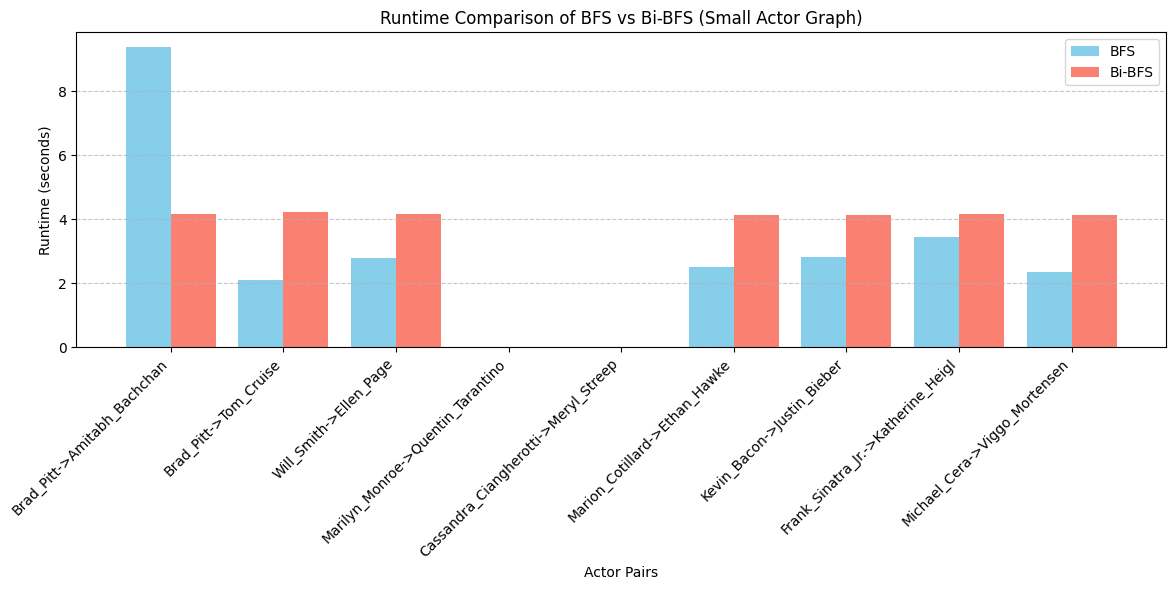

In [32]:
print("Runtime Comparison using Small Actor Graph")
input_parameters = open("more-input.txt", 'r', encoding='utf-8')  
bfs_times_small, bi_bfs_times_small, pairs_small = collect_runtime_data(input_parameters, small_actor_graph)
plot_runtime_comparison(bfs_times_small, bi_bfs_times_small, pairs_small, "Small Actor Graph")
input_parameters.close()

Runtime Comparison using Large Actor Graph


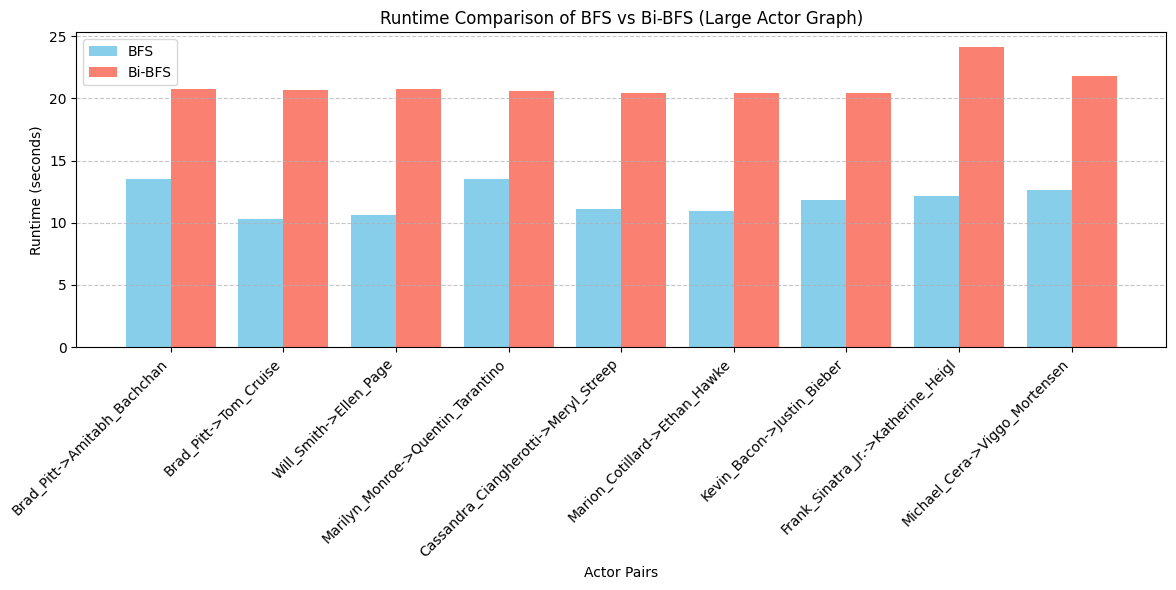

In [36]:
print("Runtime Comparison using Large Actor Graph")
input_parameters = open("more-input.txt", 'r', encoding='utf-8')  
bfs_times_large, bi_bfs_times_large, pairs_large = collect_runtime_data(input_parameters, large_actor_graph)
plot_runtime_comparison(bfs_times_large, bi_bfs_times_large, pairs_large, "Large Actor Graph")
input_parameters.close()